In [1]:
from mesh import *

from my_types import *



2023-12-03 18:19:03.413130: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-03 18:19:03.414552: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-03 18:19:03.451415: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-03 18:19:03.451895: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-03 18:19:04.162252: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co


my_types lib imported

generate mesh lib imported



[0.25, 0.125, 0.0625, 0.03125]
starting


KeyError: 'edges'

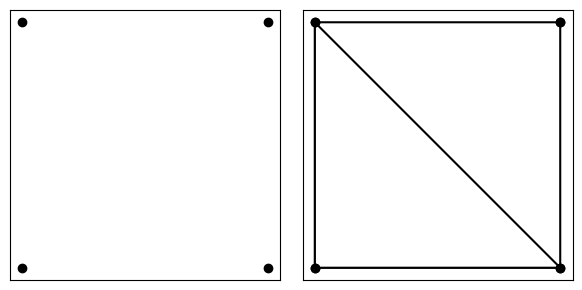

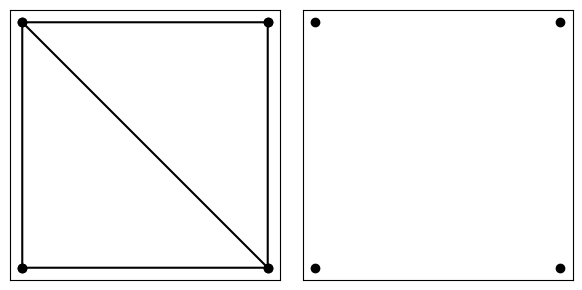

In [2]:
domain = ((0, 0), (1, 0), (1, 1), (0, 1))
base_mesh = generate_mesh(domain,0.5)

mesh=base_mesh

refinement=[0.5/2**(i) for i in range(1,5)]
print(refinement)
dofs=[]


print('starting')
for i,r in enumerate(refinement):
    H=mesh['h']
    mesh=refine_mesh(mesh,r,True)
    h=mesh['h']
    print(H/h)

[0.0125]
starting
2.8284271247461903


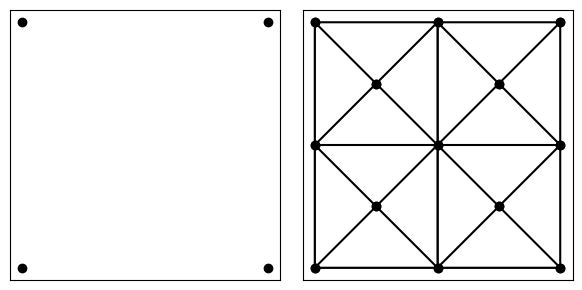

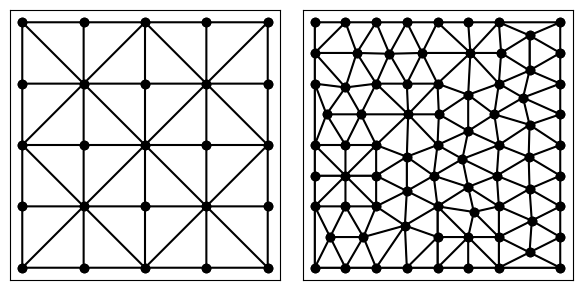

In [ ]:
j=1
domain = ((0, 0), (1, 0), (1, 1), (0, 1))
base_mesh = generate_mesh(domain,0.1)


refinement=[0.5/2**(i+1) for i in range(1,12)]

refinement=[0.0125]


print(refinement)
dofs=[]


print('starting')
for i,r in enumerate(refinement):
    H=base_mesh['h']
    base_mesh['segments'] = base_mesh['edges']
    base_mesh['segment_markers'] = base_mesh['edge_markers']
    
    mesh=refine_mesh(mesh,r,True)
    h=mesh['h']
    print(H/h)
    if i==j-1:
        break
    base_mesh=mesh

In [11]:
def area(x1, y1, x2, y2, x3, y3):
 
    return abs((x1 * (y2 - y3) + x2 * (y3 - y1) + x3 * (y1 - y2)))



def isInside(point, triangle_vertices):
    x, y = point
    x1, y1 = triangle_vertices[0]
    x2, y2 = triangle_vertices[1]
    x3, y3 = triangle_vertices[2]

	# Calculate area of triangle ABC
    A = area(x1, y1, x2, y2, x3, y3)

	# Calculate area of triangle PBC 
    A1 = area(x, y, x2, y2, x3, y3)
	
	# Calculate area of triangle PAC 
    A2 = area(x1, y1, x, y, x3, y3)
	
	# Calculate area of triangle PAB 
    A3 = area(x1, y1, x2, y2, x, y)
	
	# Check if sum of A1, A2 and A3 
	# is same as A

    
    if np.isclose(A,A1+A2+A3,0.0000000001):
        return True 
    else:
        return False

In [ ]:
triangles=[i for i in range(len(mesh['triangles']))]

N=len(base_mesh['triangles'])

zone=np.zeros((len(triangles),1))


for index in range(len(base_mesh['triangles'])):


    triangle_vertices=base_mesh['vertices'][base_mesh['triangles'][index]]



    counter=0

    for elem in reversed(triangles):
        center=np.sum(mesh['vertices'][mesh['triangles'][elem]],axis=0)/3.0
        if isInside(center,triangle_vertices)==True:
            zone[elem,0]=index
            triangles.remove(elem)
            counter=counter+1



In [ ]:
print(triangles)

[]


[[0.82932402 0.38266497]
 [0.78885778 0.31540357]
 [0.70552444 0.31803385]
 [0.69768183 0.43935205]
 [0.65601517 0.3823859 ]
 [0.78765735 0.4422614 ]]


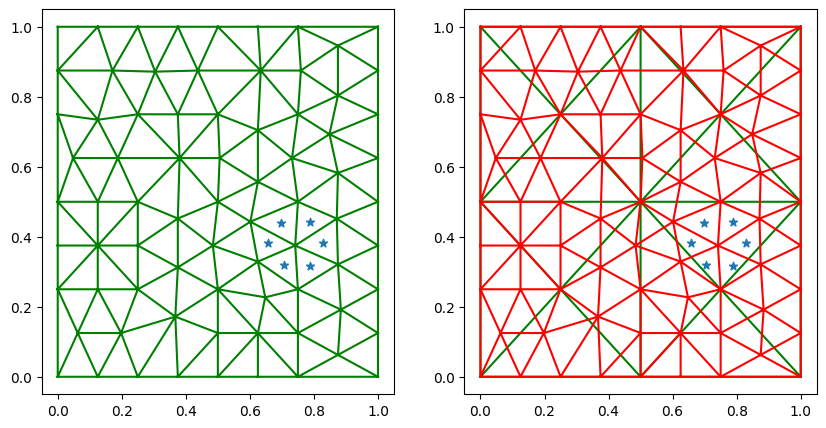

In [ ]:
triangles=[i for i in range(len(mesh['triangles']))]

t=[]

for elem in triangles:
    center=np.sum(mesh['vertices'][mesh['triangles'][elem]],axis=0)/3.0
    if zone[elem]==0:
        t.append(center)

t=np.array(t)
print(t)


fig = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1) 
plt.triplot(mesh['vertices'][:,0],mesh['vertices'][:,1],mesh['triangles'],color='g')
plt.scatter(t[:,0],t[:,1],marker='*')
plt.subplot(1, 2, 2) 
plt.triplot(base_mesh['vertices'][:,0],base_mesh['vertices'][:,1],base_mesh['triangles'],color='g')
plt.scatter(t[:,0],t[:,1],marker='*')
plt.triplot(mesh['vertices'][:,0],mesh['vertices'][:,1],mesh['triangles'],color='r')


plt.show()

In [ ]:
print(zone)

[[ 1.]
 [10.]
 [12.]
 [ 4.]
 [ 3.]
 [13.]
 [ 0.]
 [ 5.]
 [ 5.]
 [ 6.]
 [11.]
 [ 3.]
 [13.]
 [ 9.]
 [ 0.]
 [14.]
 [11.]
 [ 1.]
 [10.]
 [11.]
 [ 4.]
 [13.]
 [ 5.]
 [ 4.]
 [ 8.]
 [ 8.]
 [ 3.]
 [10.]
 [ 7.]
 [12.]
 [15.]
 [15.]
 [ 8.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 5.]
 [ 5.]
 [ 4.]
 [ 5.]
 [ 0.]
 [ 0.]
 [10.]
 [ 1.]
 [15.]
 [12.]
 [10.]
 [11.]
 [14.]
 [12.]
 [13.]
 [14.]
 [12.]
 [12.]
 [12.]
 [ 4.]
 [ 0.]
 [12.]
 [12.]
 [ 9.]
 [ 9.]
 [ 7.]
 [13.]
 [ 7.]
 [13.]
 [13.]
 [10.]
 [ 2.]
 [ 2.]
 [ 0.]
 [ 2.]
 [14.]
 [ 7.]
 [ 9.]
 [ 7.]
 [ 9.]
 [ 9.]
 [ 7.]
 [ 7.]
 [12.]
 [ 9.]
 [11.]
 [ 9.]
 [ 7.]
 [ 1.]
 [ 3.]
 [11.]
 [ 2.]
 [ 3.]
 [ 2.]
 [ 3.]
 [ 3.]
 [11.]
 [10.]
 [ 2.]
 [ 8.]
 [ 2.]
 [ 8.]
 [ 8.]
 [ 6.]
 [ 8.]
 [ 5.]
 [ 6.]
 [ 2.]
 [ 8.]
 [15.]
 [ 4.]
 [ 4.]
 [15.]
 [ 5.]
 [ 4.]
 [ 6.]
 [ 6.]
 [15.]
 [15.]
 [15.]
 [14.]
 [15.]
 [14.]
 [14.]
 [14.]
 [ 6.]]


In [30]:
def meshes(area1,area2):
    domain = ((0, 0), (1, 0), (1, 1), (0, 1))

    A = dict(vertices=np.array(domain))
    B = tr.triangulate(A, "qea"+str(area1))
    B['segments'] = B['edges']
    B['segment_markers'] = B['edge_markers']

    C = tr.triangulate(B, "epsqa"+str(area2))

    tr.compare(plt,B,C)

    return B,C


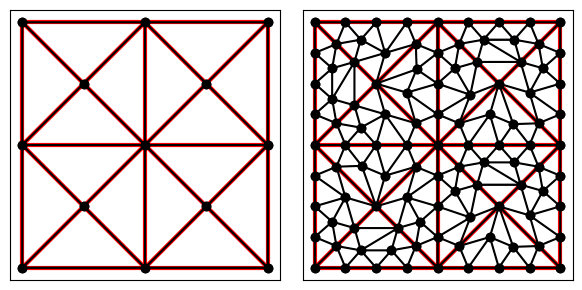

In [37]:
base_mesh,mesh=meshes(0.1,0.01)

In [12]:
triangles=[i for i in range(len(mesh['triangles']))]

N=len(base_mesh['triangles'])
print(N)
zone=np.zeros((len(triangles),1))


for index in range(len(base_mesh['triangles'])):


    triangle_vertices=base_mesh['vertices'][base_mesh['triangles'][index]]



    counter=0

    for elem in reversed(triangles):
        center=np.sum(mesh['vertices'][mesh['triangles'][elem]],axis=0)/3.0
        if isInside(center,triangle_vertices)==True:
            zone[elem,0]=index
            triangles.remove(elem)
            counter=counter+1
        if counter==N:
            break

16


In [13]:
print(triangles)

[]


[[0.57112945 0.47053722]
 [0.72916667 0.36866089]
 [0.77946278 0.39893342]
 [0.63362945 0.4469392 ]
 [0.64583333 0.39306865]
 [0.92887055 0.47053722]
 [0.75       0.30892557]
 [0.6875     0.47640199]
 [0.8125     0.47640199]
 [0.75       0.45280398]
 [0.85416667 0.39306865]
 [0.86637055 0.4469392 ]]


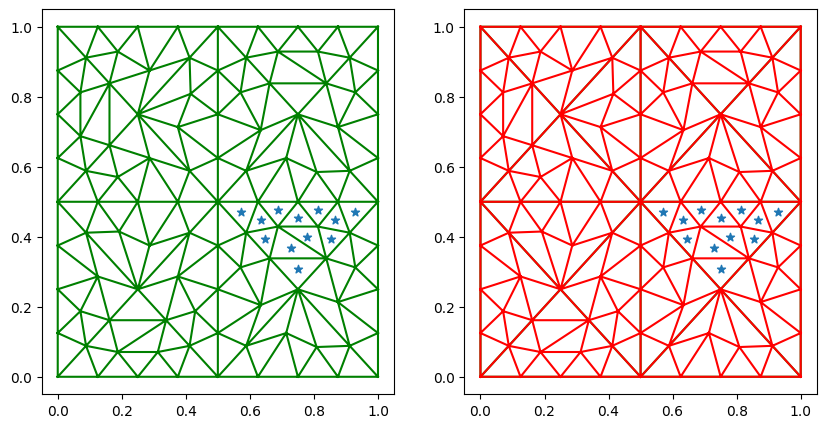

In [14]:
triangles=[i for i in range(len(mesh['triangles']))]

t=[]

for elem in triangles:
    center=np.sum(mesh['vertices'][mesh['triangles'][elem]],axis=0)/3.0
    if zone[elem]==0:
        t.append(center)

t=np.array(t)
print(t)


fig = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1) 
plt.triplot(mesh['vertices'][:,0],mesh['vertices'][:,1],mesh['triangles'],color='g')
plt.scatter(t[:,0],t[:,1],marker='*')
plt.subplot(1, 2, 2) 
plt.triplot(base_mesh['vertices'][:,0],base_mesh['vertices'][:,1],base_mesh['triangles'],color='g')
plt.scatter(t[:,0],t[:,1],marker='*')
plt.triplot(mesh['vertices'][:,0],mesh['vertices'][:,1],mesh['triangles'],color='r')
